## Data Pre-processing

In [ ]:
# ! pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=e04a5783f83e32a20b97c3a78bd64a26dfe56db75b91eb4d5cbab88839ad4141
  Stored in directory: /tmp/pip-ephem-wheel-cache-j0_d41y7/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


### Read  and Observe the csv
* column `resale_price` is target value
* df1 data has no column `remaining_lease`
* the formats of `remaining_lease` in df2 and df3 are not uniform, such as `70`, `61 years 04 months `

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
print("\n-----2012-to-dec-2014.csv------\n")
display(df1.head())

df2 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
print("\n-----2015-to-dec-2016.csv-----\n")
display(df2.head())

df3 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
print("\n-----jan-2017-onwards.csv-----\n")
display(df3.head())


-----2012-to-dec-2014.csv------



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0



-----2015-to-dec-2016.csv-----



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0



-----jan-2017-onwards.csv-----



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Calculate the Remaining Lease for df1 data
- Properties in Singapore are by two types: freehold and leasehold. All HDB flats except Studio Apartments are leased on 99 years. The remaining lease can be calculated by `99 - (record_date - lease_commence_date)`

In [2]:
def addRemainingLease(df):
    '''
    calculte the remaining_lease, generate the results as number of days
    '''
    record_date = pd.to_datetime(df['month'], format='%Y-%m', errors='ignore')
    commence_date = pd.to_datetime(df['lease_commence_date'],
                                   format='%Y',
                                   errors='ignore')
    df.insert(
        9, 'remaining_lease',
        99 - (record_date.dt.year - commence_date.dt.year))


# add remaining lease for df1
addRemainingLease(df1)
print("\n-----add remaining lease for df1-----\n")
df1.head()


-----add remaining lease for df1-----



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,73,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,67,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,67,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,71,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,67,321000.0


### Change the Remaining Lease format for df3
* we need change the `remaining_lease format` for csv 3, and use year as unit. we split this column to get year and month, then adopt the idea of rounding, when `month >= 7`, `year = year + 1`, then we use values of years as new column `remaining_lease format`.

In [3]:
def changeLeaseFormat(df):
    '''
    change the remaining_lease formats
    '''
    yearNum = df['remaining_lease'].astype('str').apply(
        lambda x: x.split(' ')[0])
    monthNum = df['remaining_lease'].astype('str').apply(
        lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else 0)
    df['remaining_lease'] = yearNum.astype('int64') + monthNum.astype('int64') // 7

print("\n-----change remaining lease format for df3-----\n")
changeLeaseFormat(df3)
display(df3.head())


-----change remaining lease format for df3-----



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,61,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


### Merge data
* Combine df1 df2 df3 into a large dataframe

In [4]:
# concat data
df = pd.concat([df1, df2, df3])

# write to file
file_name = "merged_data.csv"
df.to_csv(file_name, index=False)
df = df.reset_index(drop=True) 
display(df.head())
print(df.info())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,73,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,67,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,67,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,71,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,67,321000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169730 entries, 0 to 169729
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                169730 non-null  object 
 1   town                 169730 non-null  object 
 2   flat_type            169730 non-null  object 
 3   block                169730 non-null  object 
 4   street_name          169730 non-null  object 
 5   storey_range         169730 non-null  object 
 6   floor_area_sqm       169730 non-null  float64
 7   flat_model           169730 non-null  object 
 8   lease_commence_date  169730 non-null  int64  
 9   remaining_lease      169730 non-null  int64  
 10  resale_price         169730 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 14.2+ MB
None


## Feature Selection

### (1) Year & Month
- The format of column `month` is in this format: `2012-03`, in the real life, the flat prices may have different tendency in different month, so we break the `month` up to 2 columns `year` and `month`, the format of year: `2012`, the format of month: `3`

In [5]:
# split the date into 2 columns
def splitDate(df): 
    unix_record_date = pd.to_datetime(df['month'], format='%Y-%m', errors='ignore')
    df['month'] = unix_record_date.dt.month
    df.insert(0, "year", unix_record_date.dt.year)


print("\n-----split the date into 2 columns-----\n")
splitDate(df)
display(df.head())


-----split the date into 2 columns-----



,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2012,3,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,73,250000.0
1,2012,3,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,67,265000.0
2,2012,3,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,67,315000.0
3,2012,3,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,71,320000.0
4,2012,3,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,67,321000.0


### (2) Storey
*  The column `storey_range` provided is in a string format: `06 TO 10`, `01 TO 05`, we think the storey has a high and low relationship, for example, the `01 TO 05` to lower than `06 TO 10` which may has influence on their resale prices. we think the string format may miss out some information, so we convert the format to number by `(startLevel + endLevel)//2`

In [6]:
def changeStoreyFormat(df):
    '''
    change the remaining_lease formats
    '''
    startLevel = df['storey_range'].astype('str').apply(
        lambda x: x.split(' TO ')[0]).astype('int')
    endLevel = df['storey_range'].astype('str').apply(
        lambda x: x.split(' TO ')[1]).astype('int')
    df.insert(6, "storey",  (startLevel + endLevel)//2)

changeStoreyFormat(df)
df = df.drop("storey_range", axis=1)
display(df.head())

,year,month,town,flat_type,block,street_name,storey,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2012,3,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,8,45.0,Improved,1986,73,250000.0
1,2012,3,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,3,44.0,Improved,1980,67,265000.0
2,2012,3,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,8,68.0,New Generation,1980,67,315000.0
3,2012,3,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,3,67.0,New Generation,1984,71,320000.0
4,2012,3,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,8,67.0,New Generation,1980,67,321000.0


### pandas_profiling
* Generates profile reports from a pandas DataFrame.
* `lease_commence_date` and `remaining_lease` are highly correlated with each other(according to correlation matrix )

In [7]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df, title="Singapore HDB Flat Price Profiling Report")
profile.to_widgets()

### (3) Lease_commence_date
*  In fact, `lease_commence_date` and `remaining_lease` have similar information，`lease_commence_date` represents the time when the lease starts, and the total lease is 99 years. Considering that our data has a large time span, the `remaining_lease` represents the remaining lease in a specific released date which is more precise and helpful to our project than the fixed `lease_commence_date`.So we dorp the column `lease_commence_date`.

In [ ]:
print("\n-----drop colomn lease_commence_date-----\n")
df = df.drop('lease_commence_date', axis=1)
display(df.head())


-----drop colomn lease_commence_date-----



,year,month,town,flat_type,block,street_name,storey,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2012,3,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,8,45.0,Improved,73,250000.0
1,2012,3,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,3,44.0,Improved,67,265000.0
2,2012,3,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,8,68.0,New Generation,67,315000.0
3,2012,3,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,3,67.0,New Generation,71,320000.0
4,2012,3,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,8,67.0,New Generation,67,321000.0


### (4) Block & Street Name & Town
* we got 2 warnings from the report of `pandas_profiling`,  for these high cardinality warning, 
    We didn’t notice at first, then after we convert categorical variable into dummy/indicator variables by `pandas.get_dummies`，the number of features become huge which make the training process very slow. We think we already have column `town` which represents the location of flat, so we drop the column `block` and column `street_name`.

In [ ]:
df = df.drop('block', axis=1)
df = df.drop('street_name', axis=1)

### New profile report

In [ ]:
pandas_profiling.ProfileReport(df, title="Singapore HDB Flat Price Profiling Report")
# profile.to_file("flat_price_profiling_report.html")

### Plot some graphs
* we plot some graphs to get some basic idea of the relationship between feature and target value.
* we removed outliers (`fllo_area_sqm` > 200), according to fllo_area_sqm distribution, after that, the training size is 169719.
* we can infer that the higher the floor area and storey, the higher is the resale price,  the 5 room falt type are expensive than room < 4 generally, and the other 2 types flat are more expensive 

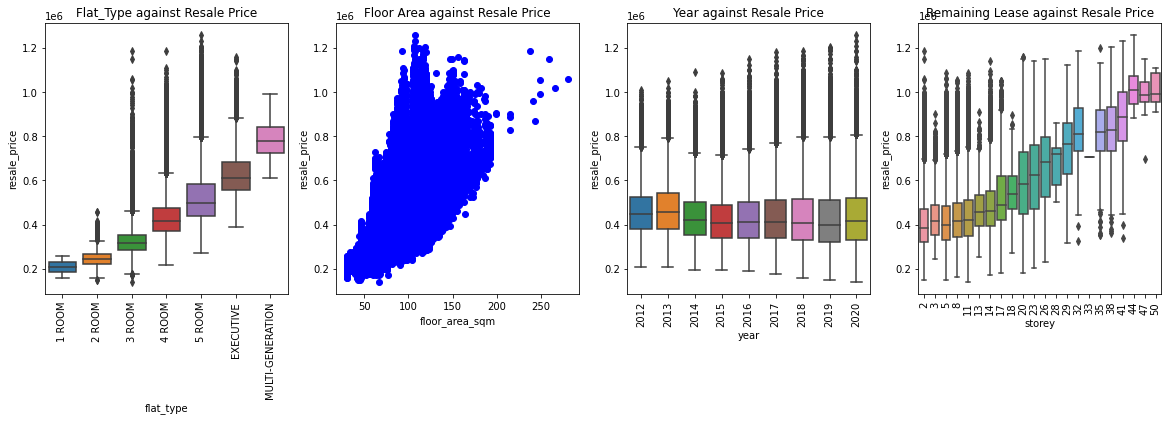

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169719 entries, 0 to 169729
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             169719 non-null  int64  
 1   month            169719 non-null  int64  
 2   town             169719 non-null  object 
 3   flat_type        169719 non-null  object 
 4   storey           169719 non-null  int64  
 5   floor_area_sqm   169719 non-null  float64
 6   flat_model       169719 non-null  object 
 7   remaining_lease  169719 non-null  int64  
 8   resale_price     169719 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.9+ MB
None


In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,4, figsize=(20, 5))
# use boxplot to get more information
# it is helpful in showing us the distribution of the target label given a particular feature.
col = 'flat_type'
df_sort = df.sort_values(col)
data = pd.concat([df_sort['resale_price'], df_sort[col]], axis=1)
plt.subplot(1, 4, 1)
plt.xticks(rotation=90)
fig = sns.boxplot(x=col, y="resale_price", data=data)
plt.title("Flat_Type against Resale Price")
plt.xlabel("flat_type")
plt.ylabel("resale_price")

# for floor_area_sqm, it's numeric, we can just plot it
plt.subplot(1, 4, 2)
plt.scatter(x=df.floor_area_sqm, y=df.resale_price,color='b')
plt.title("Floor Area against Resale Price")
plt.xlabel("floor_area_sqm")
plt.ylabel("resale_price")

plt.subplot(1, 4, 3)
col = 'year'
df_sort = df.sort_values(col)
data = pd.concat([df_sort['resale_price'], df_sort[col]], axis=1)
plt.xticks(rotation=90)
fig = sns.boxplot(x=col, y="resale_price", data=data)
plt.xlabel("year")
plt.ylabel("resale_price")
plt.title("Year against Resale Price")


plt.subplot(1, 4, 4)
col = 'storey'
df_sort = df.sort_values(col)
data = pd.concat([df_sort['resale_price'], df_sort[col]], axis=1)
plt.xticks(rotation=90)
fig = sns.boxplot(x=col, y="resale_price", data=data)
plt.xlabel("storey")
plt.ylabel("resale_price")
plt.title("Remaining Lease against Resale Price")
plt.show()

# remove outliers when fllo_area_sqm > 200
df.drop(df[(df['floor_area_sqm']>200)].index,inplace=True)
print(df.info())

### log1p-transform the target value
* We observed the histogram plot of target value, and distribution is right-skewed, so the use log1p function to transform the target value, bacause skewed data is not preferred for modeling, log1p is a normal way to reduce skewness.
* Reference:https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8

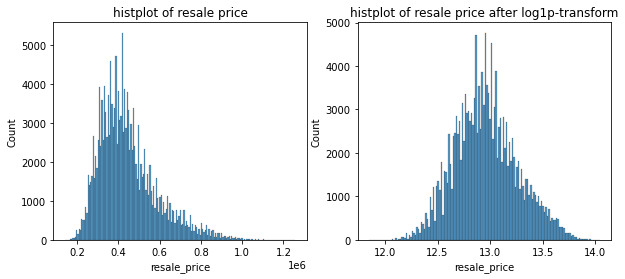

In [ ]:
# get the target value
y = df.iloc[:, -1]

# plot the histplot
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(y)
plt.title("histplot of resale price")

plt.subplot(1, 2, 2)
# apply log1p-transform
y = np.log1p(y)
sns.histplot(y)
plt.title("histplot of resale price after log1p-transform")
plt.show()

### Convert categorical features
* Convert categorical variable into dummy/indicator variables

In [ ]:
X = df.iloc[:, :-1]
X = pd.get_dummies(X) 
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169719 entries, 0 to 169729
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   year                               169719 non-null  int64  
 1   month                              169719 non-null  int64  
 2   storey                             169719 non-null  int64  
 3   floor_area_sqm                     169719 non-null  float64
 4   remaining_lease                    169719 non-null  int64  
 5   town_ANG MO KIO                    169719 non-null  uint8  
 6   town_BEDOK                         169719 non-null  uint8  
 7   town_BISHAN                        169719 non-null  uint8  
 8   town_BUKIT BATOK                   169719 non-null  uint8  
 9   town_BUKIT MERAH                   169719 non-null  uint8  
 10  town_BUKIT PANJANG                 169719 non-null  uint8  
 11  town_BUKIT TIMAH                   1697

### Lasso Regression for feature selection

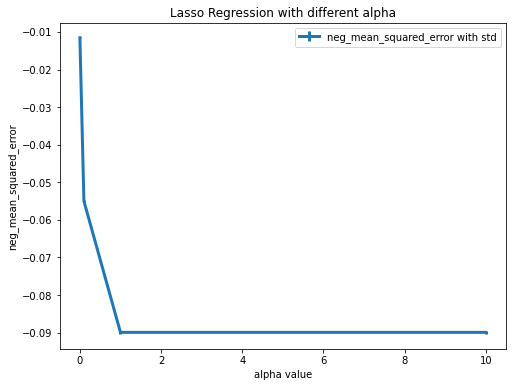

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169719 entries, 0 to 169729
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   year                               169719 non-null  int64  
 1   month                              169719 non-null  int64  
 2   storey                             169719 non-null  int64  
 3   floor_area_sqm                     169719 non-null  float64
 4   remaining_lease                    169719 non-null  int64  
 5   town_ANG MO KIO                    169719 non-null  uint8  
 6   town_BEDOK                         169719 non-null  uint8  
 7   town_BISHAN                        169719 non-null  uint8  
 8   town_BUKIT BATOK                   169719 non-null  uint8  
 9   town_BUKIT MERAH                   169719 non-null  uint8  
 10  town_BUKIT PANJANG                 169719 non-null  uint8  
 11  town_BUKIT TIMAH                   1697

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# normalize
scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

# try different alpha
alpha_range = [0.001, 0.1, 1, 10]
neg_mean_error = []
std_error = []
for alpha in alpha_range:
    model = Lasso(alpha=alpha, max_iter=3000)
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='neg_mean_squared_error')
    neg_mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(alpha_range,
             neg_mean_error,
             yerr=std_error,
             linewidth=3,
             label="neg_mean_squared_error with std")
plt.xlabel("alpha value")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.title("Lasso Regression with different alpha")
plt.show()

# when alpha=0.001, the model is reasonable
lasso_model = Lasso(alpha=0.001, max_iter=5000).fit(X_train, y_train)
feature_importances = pd.DataFrame({"Feature Importance": lasso_model.coef_},
                                   index=X.columns)
pd.set_option('display.max_rows', None)

# show the feature importances
feature_importances.sort_values("Feature Importance", ascending=False)

# keep relevant features
relevant_features = feature_importances[
    feature_importances["Feature Importance"] != 0]

choosed_cols = relevant_features.index.tolist()
choosed_X = X[choosed_cols]
print(choosed_X.info())

### Split data into training data and test data
* use StandardScaler
* for test data, we need to transform it by the scaler which fitted X_train before

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(choosed_X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

### Baseline model
* Considering the `floor_area_sqm` that has the greatest impact on housing prices, we build a LinearRegression model as baseline model which only used `floor_area_sqm`.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from time import time

# Baseline
floor_area_sqm_index = X.columns.get_loc("floor_area_sqm")
base_train_x = X_train[:, floor_area_sqm_index].reshape(-1, 1)
baseline_model = LinearRegression()
baseline_model.fit(base_train_x, y_train)


startTime = time()
y_pred = baseline_model.predict(X_test[:, floor_area_sqm_index].reshape(-1, 1))
baseline_predict_time = time() - startTime
print("prediction cost time: {}s".format(baseline_predict_time))                             
# calculate the mean_squared_error                             
baseline_squared_error = mean_squared_error(y_test, y_pred)
print("Baseline mean_squared_error:{}".format(baseline_squared_error))

prediction cost time: 0.0006771087646484375s
Baseline mean_squared_error:0.0450223923015943


### Ridge regression

[-0.011473586054185903, -0.011473585982208724, -0.011473585303132593, -0.01147358256020231, -0.011473657081058514, -0.011473939186792815, -0.011502121376682203]


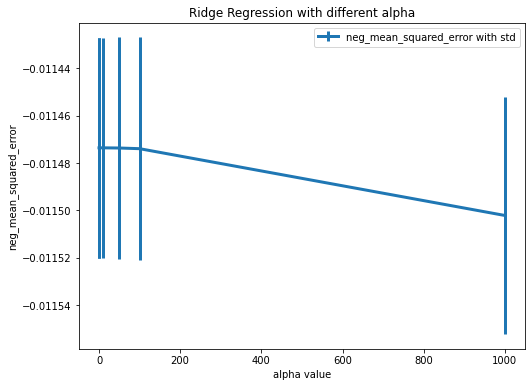

In [ ]:
from sklearn.model_selection import cross_val_score

# try different alpha value 
def chooseAlphaForRegession(alpha_range, model_name):
    neg_mean_squared_error=[]
    std_error=[]
    for alpha in alpha_range: 
        if model_name == "Ridge":
            model = Ridge(alpha=alpha, max_iter=5000).fit(X_train, y_train)
        elif model_name == "Lasso":
            model = Lasso(alpha=alpha, max_iter=5000).fit(X_train, y_train)
            
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
        neg_mean_squared_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())

    print(neg_mean_squared_error)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.errorbar(alpha_range,
                 neg_mean_squared_error,
                 yerr=std_error,
                 linewidth=3,
                 label="neg_mean_squared_error with std")
    plt.xlabel("alpha value")
    plt.ylabel("neg_mean_squared_error")
    plt.title("{} Regression with different alpha".format(model_name))
    plt.legend()
    plt.show()

alpha_range =[0.01, 0.1, 1, 10, 50, 100, 1000]
chooseAlphaForRegession(alpha_range, "Ridge")

In [ ]:
# choose alpha=1 to keep model simple
model = Ridge(alpha=1, max_iter=5000).fit(X_train, y_train)
startTime = time() 
Ridge_squared_error = mean_squared_error(y_test, model.predict(X_test))
Ridge_predict_time = time() - startTime
print("prediction cost time: {}".format(Ridge_predict_time))   
print("Ridge_mean_squared_error:{}".format(Ridge_squared_error))

prediction cost time: 0.004296541213989258
Ridge_mean_squared_error:0.011559530982336268


### Lasso

[-0.01609566096541457, -0.05487362869612992, -0.08976623280786615, -0.08976623280786615, -0.08976623280786615, -0.08976623280786615]


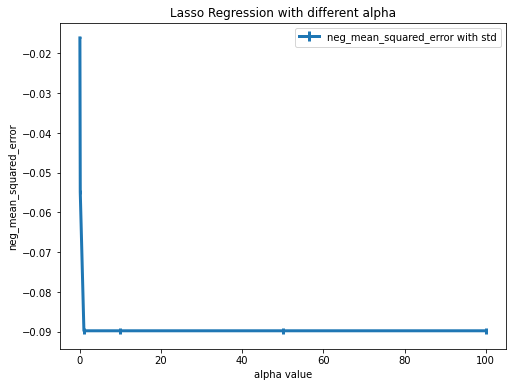

[-0.011474341533297794, -0.011492040826959125, -0.011547066959225595, -0.01285078747392632, -0.01609566096541457]


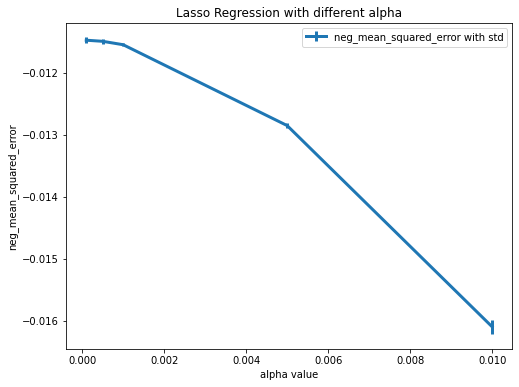

In [ ]:
alpha_range =[0.01, 0.1, 1, 10, 50, 100]
chooseAlphaForRegession(alpha_range, "Lasso")

# choose a smaller range
alpha_range =[0.0001, 0.0005, 0.001, 0.005, 0.01]
chooseAlphaForRegession(alpha_range, "Lasso")

In [ ]:
# choose alpha= to keep model simple
model = Lasso(alpha=0.0001, max_iter=5000).fit(X_train, y_train) 
startTime = time()
Lasso_squared_error = mean_squared_error(y_test, model.predict(X_test))
Lasso_predict_time = time() - startTime;
print("prediction cost time: {}".format(Lasso_predict_time))  
print("Lasso_mean_squared_error:{}".format(Lasso_squared_error))

prediction cost time: 0.009203195571899414
Lasso_mean_squared_error:0.011562325106415026


### KNeighborsRegressor

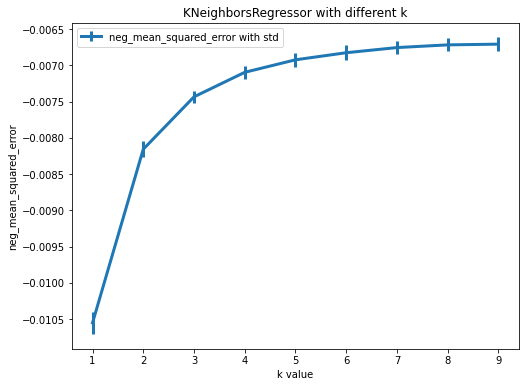

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

# try different k
k_range = range(10)
neg_mean_error=[]
std_error=[]
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    neg_mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(k_range,
                 neg_mean_error,
                 yerr=std_error,
                 linewidth=3,
                 label="neg_mean_squared_error with std")
plt.xlabel("k value")
plt.ylabel("neg_mean_squared_error")
plt.title("KNeighborsRegressor with different k")
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# choose n_neighbors=8
startTime = time()
pred = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train).predict(X_test)
KNN_predict_time = time() - startTime
print("prediction cost time: {}s".format(KNN_predict_time)) 
KNN_mean_squared_error = mean_squared_error(y_test, pred)
print("KNN_mean_squared_error:{}".format(KNN_mean_squared_error))

prediction cost time: 475.8926010131836s
KNN_mean_squared_error:0.0065115452343240164


### Result

In [ ]:
print("\n------Baseline-----")
print("time costs of prediction = {}s".format(baseline_predict_time))
print("mean squared error = {}".format(baseline_squared_error))

print("\n------Lasso Regression-----")
print("time costs of prediction = {}s".format(Ridge_predict_time))
print("mean squared error = {}".format(Ridge_squared_error))

print("\n------Ridge Regression-----")
print("time costs of prediction = {}s".format(Lasso_predict_time))
print("mean squared error = {}".format(Lasso_squared_error))

print("\n------KNeighborsRegressor-----")
print("time costs of prediction = {}s".format(KNN_predict_time))
print("mean squared error = {}".format(KNN_mean_squared_error))


------Baseline-----
time costs of prediction = 0.0006771087646484375s
mean squared error = 0.0450223923015943

------Lasso Regression-----
time costs of prediction = 0.004296541213989258s
mean squared error = 0.011559530982336268

------Ridge Regression-----
time costs of prediction = 0.009203195571899414s
mean squared error = 0.011562325106415026

------KNeighborsRegressor-----
time costs of prediction = 475.8926010131836s
mean squared error = 0.0065115452343240164
